<a href="https://colab.research.google.com/github/reshminambiar/DW15_Task5/blob/main/DW15_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement
Identify the factors that predict future user adoption


In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#getting the 'takehome_users' data into a dataframe
df2 = pd.read_csv('takehome_users.csv',encoding='latin-1')#Reading csv file in utf-8 doesn't work 

Going through the data to get a gist of it

In [ ]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [ ]:
#Checking on various creation_source available
df2.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [ ]:
df2.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [ ]:
df2.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [ ]:
df2.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [ ]:
df2.creation_time.min()

'2012-05-31 00:43:27'

In [ ]:
df2.creation_time.max()

'2014-05-30 23:59:19'

In [4]:
#I think we don't need name and email columns as we have user id,so removing them for better readability
df2.drop(['name','email'],axis=1, inplace=True)

In [5]:
#Converting the date fields to datetime datatype
df2['last_session_creation_time'] = pd.to_datetime(df2.last_session_creation_time)
df2['creation_time'] = pd.to_datetime(df2.creation_time)

In [6]:
#Renaming object_id as user_id for readability
df2.rename(columns = {'object_id':'user_id'}, inplace = True)

In [ ]:
df2.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0


In [15]:
#getting the 'takehome_user_engagement' data into a dataframe
df1  = pd.read_csv('takehome_user_engagement.csv')

In [ ]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
df1.shape

(207917, 3)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [ ]:
df1['visited'].value_counts() #We can see that 'visited'column has a single value 1 or only visited entries are made

1    207917
Name: visited, dtype: int64

In [ ]:
df1.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [17]:
df1['time_stamp'] = pd.to_datetime(df1.time_stamp) #changing the time_stamp column to datetime type

In [18]:
df1.sort_values(by=['time_stamp','user_id'],ignore_index=True,inplace=True)

In [ ]:
df1.head()

,time_stamp,user_id,visited
0,2012-05-31 08:20:06,10012,1
1,2012-05-31 15:47:36,3428,1
2,2012-05-31 17:19:37,9899,1
3,2012-05-31 21:58:33,1693,1
4,2012-06-01 00:17:30,6102,1


Adding a column to identify each row by a year and week combination. As we need windows of 7 days to find adopted users and we have multiple years data, I thought it would be better to use year-week combination

In [19]:
df1['year_week'] = df1.time_stamp.dt.strftime('%Y-%W') 

In [ ]:
df1.head()

,time_stamp,user_id,visited,year_week
0,2012-05-31 08:20:06,10012,1,2012-22
1,2012-05-31 15:47:36,3428,1,2012-22
2,2012-05-31 17:19:37,9899,1,2012-22
3,2012-05-31 21:58:33,1693,1,2012-22
4,2012-06-01 00:17:30,6102,1,2012-22


In [13]:
df1.year_week.nunique()

108

We try to find adopted users as per the definition,by looping through each user and saving it in a dictionary

In [101]:
adopted_user_dict={} #dictionary to store adopted users
weeks=df1.year_week
user_id_list = list(df1.user_id.unique())#we get all unique user ids

#loop over user ids
for i in range(len(user_id_list)):
    user_id=user_id_list[i]
    #dataframe for specific user that has duplicate records by year_weak column
    reduced_df=df1[(df1['user_id']==user_id)&(weeks.isin(weeks[weeks.duplicated()]))]
    #count the number of duplicate 'day' records of weeks.We keep only if its greater than 2
    week_counts=reduced_df.year_week.value_counts()[reduced_df.year_week.value_counts()>2]
    #We get those rows with weaks where particular weak is present atleast 3 times
    three_logins=reduced_df[reduced_df.year_week.isin(list(week_counts.index))]
    #remove duplicates of 3 day events within week
    three_logins=three_logins[~three_logins.duplicated()]
    #code user id and number of 3 day events
    adopted_user_dict[str(user_id)]=len(three_logins)

In [102]:
len(adopted_user_dict)

8823

In [ ]:
#creating a column which stores this no.of three logins from the created dictionay
df1['user_engagement']=df1['user_id'].apply(lambda x: adopted_user_dict[str(x)])
#Creating a column with boolean values for adopted_user
df1['adopted_user']=0
df1['adopted_user'][df1['user_engagement']>0]=1

In [88]:
df1.head()

,time_stamp,user_id,visited,year_week,user_engagement,adopted_user
0,2012-05-31 08:20:06,10012,1,2012-22,0,0
1,2012-05-31 15:47:36,3428,1,2012-22,0,0
2,2012-05-31 17:19:37,9899,1,2012-22,0,0
3,2012-05-31 21:58:33,1693,1,2012-22,235,1
4,2012-06-01 00:17:30,6102,1,2012-22,0,0


In [89]:
adopted_count=df1[['user_id','adopted_user']][df1['adopted_user']==1].groupby('user_id').count()
print('Number of adopted users:',len(adopted_count))

Number of adopted users: 1444


In [ ]:
adopted= df1[['user_id','adopted_user']]
adopted.drop_duplicates(keep='first', inplace=True)

In [104]:
adopted['adopted_user'].value_counts()

0    7379
1    1444
Name: adopted_user, dtype: int64

In [106]:
#Merge the adopted user info to users dataframe
adopted_users = df2.merge(adopted, on='user_id', how='left')

In [93]:
adopted_users.shape

(12000, 9)

In [ ]:
adopted_users.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0.0


We finally have a combined dataframe with a column for adopted_users as well.
Some preprocessing needs to done before jumping into model building

In [ ]:
#All the last_session_creation_time is on the same day and on 01-01-1970, users are created from 2012-2014
#So I don't think it can be of some importance. 
adopted_users['last_session_creation_time'].dt.day.nunique()

1

In [107]:
#Removing the column
adopted_users.drop('last_session_creation_time',axis=1,inplace=True)

In [ ]:
adopted_users.shape

(12000, 8)

In [108]:
#We have 5 categorical values for creation_source.I think doing a one-hot encoding might help
adopted_users = pd.get_dummies(adopted_users, columns=["creation_source"], prefix=["CS"])
adopted_users.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,CS_GUEST_INVITE,CS_ORG_INVITE,CS_PERSONAL_PROJECTS,CS_SIGNUP,CS_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,0,0,1,316.0,1.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,0,0,94,1525.0,0.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,0,0,1,5151.0,0.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,0,0,193,5240.0,0.0,1,0,0,0,0


In [109]:
#Certain users who didn't have transactions have adopted_user field as null.They can be replaced with 0.
adopted_users['adopted_user'] = adopted_users['adopted_user'].fillna(0)

In [110]:
#The null values in the invited_by_user_id are replaced with 0 and available values with 1 to generate a binary column,
#to indicate if the user has been invited by another user or not.
adopted_users['invited_by_user_id'] = np.where(adopted_users['invited_by_user_id'].isnull(),0,1)

In [111]:
adopted_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   opted_in_to_mailing_list    12000 non-null  int64         
 3   enabled_for_marketing_drip  12000 non-null  int64         
 4   org_id                      12000 non-null  int64         
 5   invited_by_user_id          12000 non-null  int64         
 6   adopted_user                12000 non-null  float64       
 7   CS_GUEST_INVITE             12000 non-null  uint8         
 8   CS_ORG_INVITE               12000 non-null  uint8         
 9   CS_PERSONAL_PROJECTS        12000 non-null  uint8         
 10  CS_SIGNUP                   12000 non-null  uint8         
 11  CS_SIGNUP_GOOGLE_AUTH       12000 non-null  uint8     

In [112]:
adopted_users.adopted_user = adopted_users.adopted_user.astype('int32')

In [113]:
adopted_users.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,CS_GUEST_INVITE,CS_ORG_INVITE,CS_PERSONAL_PROJECTS,CS_SIGNUP,CS_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,1,0,11,1,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,0,0,1,1,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,0,0,94,1,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,0,0,1,1,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,0,0,193,1,0,1,0,0,0,0


In [115]:
#Just saving a copy of dataframe 
adopted_users_copy = adopted_users

In [116]:
#I think its a good idea to have creation year and month in seperate columns to see 
#if it has an effect on adopted user rather than the timestamp itself 
adopted_users['creation_year'] = adopted_users['creation_time'].dt.year
adopted_users['creation_month'] = adopted_users['creation_time'].dt.month

In [62]:
adopted_users.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,CS_GUEST_INVITE,CS_ORG_INVITE,CS_PERSONAL_PROJECTS,CS_SIGNUP,CS_SIGNUP_GOOGLE_AUTH,creation_year,creation_month
0,1,2014-04-22 03:53:30,1,0,11,1,0,1,0,0,0,0,2014,4
1,2,2013-11-15 03:45:04,0,0,1,1,1,0,1,0,0,0,2013,11
2,3,2013-03-19 23:14:52,0,0,94,1,0,0,1,0,0,0,2013,3
3,4,2013-05-21 08:09:28,0,0,1,1,0,1,0,0,0,0,2013,5
4,5,2013-01-17 10:14:20,0,0,193,1,0,1,0,0,0,0,2013,1


In [117]:
adopted_users.to_csv('adopted_users_final2.csv') # Just saving as a csv so that we needn't do all the above steps each time.

In [ ]:
#To be run only if data is taken from this csv
#adopted_users = pd.read_csv('adopted_users_final1.csv',index_col=False)
#adopted_users = adopted_users.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]]

We have processed our dataframe to suit model preparation.I plan not to use 
user_id and creation_time for model_building, but I'll keep them in the dataframe for now.Starting with some EDA..


In [118]:
print(adopted_users['opted_in_to_mailing_list'].value_counts())
print(adopted_users['enabled_for_marketing_drip'].value_counts())
print(adopted_users['invited_by_user_id'].value_counts())

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64
0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64
1    6417
0    5583
Name: invited_by_user_id, dtype: int64


In [ ]:
adopted_users.groupby('creation_year')['adopted_user'].sum()

creation_year
2012    415
2013    806
2014    223
Name: adopted_user, dtype: int32

In [ ]:
adopted_users.groupby('creation_year')['adopted_user'].count()

creation_year
2012    2797
2013    5676
2014    3527
Name: adopted_user, dtype: int64

In [ ]:
ratio = (adopted_users.groupby('creation_year')['adopted_user'].sum())/(adopted_users.groupby('creation_year')['adopted_user'].count())

In [ ]:
ratio

creation_year
2012    0.148373
2013    0.142001
2014    0.063227
Name: adopted_user, dtype: float64

In [ ]:
adopted_users['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [ ]:
adopted_users.groupby('creation_month')['adopted_user'].sum()

creation_month
1     131
2     117
3     126
4      89
5      68
6     137
7     111
8     131
9     129
10    154
11    135
12    116
Name: adopted_user, dtype: int32

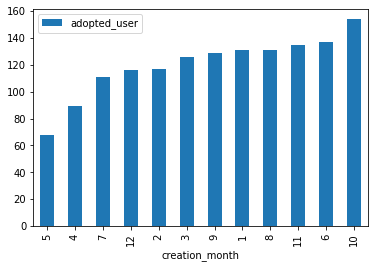

In [55]:
x = pd.DataFrame(adopted_users.groupby('creation_month')['adopted_user'].sum())
x.sort_values(by = 'adopted_user', inplace=True)
x.plot(kind='bar')
plt.show()

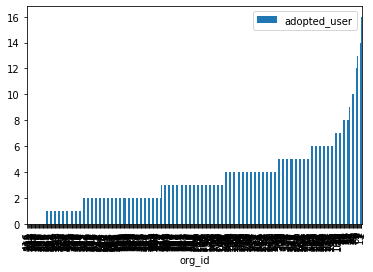

In [60]:
x = pd.DataFrame(adopted_users.groupby('org_id')['adopted_user'].sum())
x.sort_values(by = 'adopted_user', inplace=True)
x.plot(kind='bar')
plt.show()
#Though each org_id is not seen, we can see that user adoption is clearly dependent on organization

In [119]:
#Thesea are the data we will use as input
adopted_users[['opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','CS_GUEST_INVITE','CS_ORG_INVITE','CS_PERSONAL_PROJECTS','CS_SIGNUP','CS_SIGNUP_GOOGLE_AUTH','creation_year','creation_month']]

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,CS_GUEST_INVITE,CS_ORG_INVITE,CS_PERSONAL_PROJECTS,CS_SIGNUP,CS_SIGNUP_GOOGLE_AUTH,creation_year,creation_month
0,1,0,11,1,1,0,0,0,0,2014,4
1,0,0,1,1,0,1,0,0,0,2013,11
2,0,0,94,1,0,1,0,0,0,2013,3
3,0,0,1,1,1,0,0,0,0,2013,5
4,0,0,193,1,1,0,0,0,0,2013,1
...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,89,1,0,1,0,0,0,2013,9
11996,0,0,200,0,0,0,0,0,1,2013,1
11997,1,1,83,1,1,0,0,0,0,2014,4
11998,0,0,6,0,0,0,1,0,0,2012,5


Certain assumptions and points to note:

1.   As I have researched,I got to see that decision trees are best suited for 
these types of problems to find feature importances.I decided to go with those.
2.   I have given stratify=Y as the value_count in the dependent variable was not comparable.
2.   I have not done any parameter tuning as our intention is to get the important features and not the best possible accuracy.



In [120]:
#The list of columns we use in our X
l =['opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','CS_GUEST_INVITE','CS_ORG_INVITE','CS_PERSONAL_PROJECTS','CS_SIGNUP','CS_SIGNUP_GOOGLE_AUTH','creation_year','creation_month']

##Decision Tree Classifier

0.7905555555555556
[0.04300388 0.03491884 0.54409251 0.01554995 0.01266812 0.02203493
 0.00960738 0.01950121 0.01639782 0.04907246 0.23315289]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


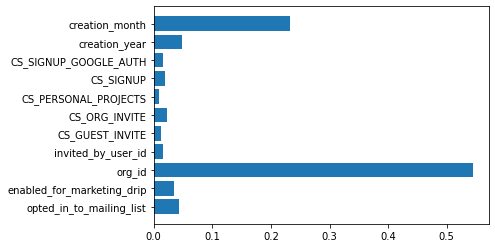

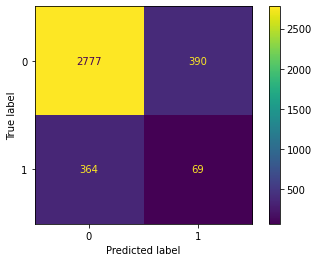

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix
X = adopted_users.iloc[:,[2,3,4,5,7,8,9,10,11,12,13]] #All cols except adopted_user,user_id and creation_time
Y =adopted_users.iloc[:,6] 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2,stratify=Y)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print(model.feature_importances_)
plt.barh(range(len(model.feature_importances_)), model.feature_importances_, tick_label=l)
plot_confusion_matrix(model,x_test,y_test)
plt.show()

## XgBoost Classifier

0.8797222222222222
[0.03184153 0.09778899 0.08512892 0.01848099 0.08789659 0.075091
 0.15050434 0.05025497 0.0771415  0.22263916 0.10323201]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


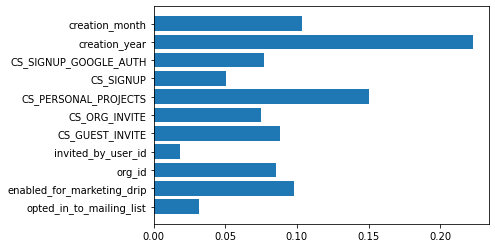

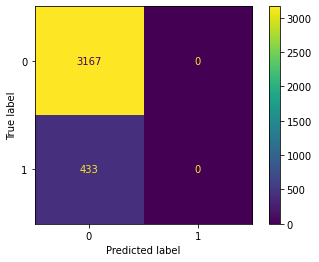

In [122]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix
X = adopted_users.iloc[:,[2,3,4,5,7,8,9,10,11,12,13]] #All cols except adopted_user,user_id and creation_time
Y =adopted_users.iloc[:,6] 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2,stratify=Y)
model = XGBClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print(model.feature_importances_)
plt.barh(range(len(model.feature_importances_)), model.feature_importances_, tick_label=l)
plot_confusion_matrix(model,x_test,y_test)
plt.show()

## Random Forest Classifier

0.8275
[0.02181866 0.01804285 0.74455143 0.00375159 0.00524501 0.00433902
 0.00731379 0.00520885 0.00532636 0.03032039 0.15408205]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


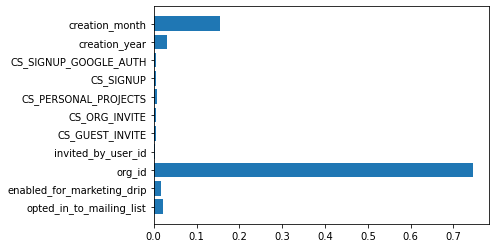

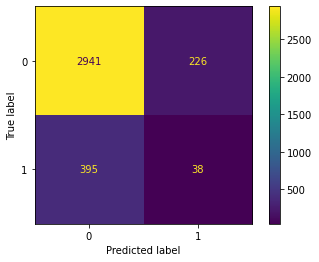

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix
X = adopted_users.iloc[:,[2,3,4,5,7,8,9,10,11,12,13]] #All cols except adopted_user,user_id and creation_time
Y =adopted_users.iloc[:,6] 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2,stratify=Y)
model = RandomForestClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print(model.feature_importances_)
plt.barh(range(len(model.feature_importances_)), model.feature_importances_, tick_label=l)
plot_confusion_matrix(model,x_test,y_test)
plt.show()

##Conclusion


1.   After modelling with DecisionTreeClassifier,XgBoost and RandomForest we could see that XgBoost model does not learn at all.It has predicted 0 for all values.So we don't consider it.
2.   Among the other two, Random forest gives a higher accuracy of 82.75%
3.   DecisionTreeClassifer and RandomForest gives similar precision of 0.15 and 0.143 respectively.
4.   But the recall is lesser for RandomForest at 0.087 compared to decisionTree at 15.9
5.   The most important factor that predicts user adoption is seen to be the org_id.It clearly outstands all other features.It means users belonging to certain organization tends to use the product visibly more than certain others.
6.   User creation month is also seen as an important factor
In the plots plotted above during EDA also validates this.User adoption of users joined in May and April seem to be considerably less.









